In [123]:
# Initial imports
import pandas as pd
import numpy as np 
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline 

In [265]:
# Set the file path
file_path = Path("whale_returns.csv")
whale_returns = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index() 
# Take a sample of the data
whale_returns.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-12-04,0.008003,0.007254,0.012094,0.022917
2015-12-03,-0.012023,-0.007407,-0.018869,-0.015716
2019-01-14,-0.001999,-0.005161,0.007798,-0.001253
2017-09-21,-0.004099,-0.004376,-0.007075,-0.006225
2017-01-30,-0.002927,-0.005236,-0.005248,-0.001899


In [266]:
# Identify DataFrame Data Types by retrieving DataFrame data types
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [231]:
# Assess data quality by identifying the number of rows
 ## Identify Series count 
whale_returns.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [6]:
# Assess data quality by checking for nulls
## Check for null values
whale_returns.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [233]:
# Assess data quality by determining the percentage of nulls 
whale_returns.isnull().mean() *100 

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [234]:
# Assess data quality by determining the number of nulls 
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [235]:
# Clean nulls from DataFrame by filling na
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [236]:
# Cleaning nulls from DataFrame by dropping 
whale_returns = whale_returns.dropna().copy()

#Check the number of nulls again 
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [237]:
#Assess data quality by checking for duplicate rows
whale_returns.duplicated()

Date
2015-03-03    False
2015-03-04    False
2015-03-05    False
2015-03-06    False
2015-03-09    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1059, dtype: bool

In [239]:
# Cleanse data by dropping duplicates 
whale_returns = whale_returns.drop_duplicates().copy()

In [240]:
# Assess data quality by using head function to sample data and identify currency symbols
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [264]:
# Set the file path 
file_path = Path("algo_returns.csv")
algo_returns = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index() 
# Take a sample of the data
algo_returns.sample(5)

,Algo 1,Algo 2
Date,,
2017-02-21,-0.004355,0.002265
2018-09-24,0.012860,-0.003643
2015-06-29,0.000903,-0.023736
2015-04-17,-0.000194,-0.010692
2018-11-13,-0.007843,-0.001947


In [242]:
# Identify DataFrame Data Types by retrieveing DataFrame data types
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [243]:
# Assess data quality by identifying the number of rows
 ## Identify Series count
algo_returns.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [17]:
# Identify frequency of values
algo_returns["Date"].value_counts()

2014-05-28    1
2017-09-05    1
2017-09-14    1
2017-09-13    1
2017-09-12    1
             ..
2016-01-15    1
2016-01-14    1
2016-01-13    1
2016-01-12    1
2019-05-01    1
Name: Date, Length: 1241, dtype: int64

In [244]:
# Assess data quality by checking for nulls
## Check for null values
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [245]:
# Assess data quality by determining the percentage of nulls
algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [246]:
# Assess data quality by determining the number of nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [247]:
# Cleans nulls from DataFrame by filling na
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [248]:
# Cleaning nulls from DataFrame by dropping 
algo_returns = algo_returns.dropna().copy()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [249]:
# Check the number of nulls again
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [250]:
# Assess data quality by checking for duplicate rows
algo_returns.duplicated()

Date
2014-06-05    False
2014-06-06    False
2014-06-09    False
2014-06-10    False
2014-06-11    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1235, dtype: bool

In [252]:
# Cleanse data by dropping duplicates
algo_returns = algo_returns.drop_duplicates().copy()

In [253]:
# Assess data quality by using head function to sample data and identify currency symbols
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [263]:
# Set the file path
file_path = Path("sp500_history.csv")
sp500_history = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index() 
# Take a sample of the data
sp500_history.sample(5)

,Close
Date,
2017-08-22,$2452.51
2015-06-29,$2057.64
2014-09-04,$1997.65
2014-10-10,$1906.13
2014-03-07,$1878.04


In [258]:
# Identify Dataframe Data Types by retrieving DataFrame data types
sp500_history.dtypes

Close    object
dtype: object

In [259]:
# Assess data quality by identifying the number of rows
 ## Identify Series count 
sp500_history.count()

Close    1649
dtype: int64

In [31]:
# identify frequency of values
sp500_history["Date"]. value_counts()

23-Apr-19    1
11-Dec-14    1
26-Nov-14    1
28-Nov-14    1
1-Dec-14     1
            ..
16-Feb-17    1
17-Feb-17    1
21-Feb-17    1
22-Feb-17    1
1-Oct-12     1
Name: Date, Length: 1649, dtype: int64

In [260]:
# Assess data quality by checking for nulls
## Check for null values
sp500_history.isnull()

,Close
Date,
2019-04-23,False
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [261]:
# Assess data quality by determining the percentage of nulls 
sp500_history.isnull().mean() *100

Close    0.0
dtype: float64

In [34]:
# No nulls found
#Assess data quality by checking for duplicate rows
sp500_history.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool

In [35]:
# Cleanse data by dropping duplicates
sp500_history = sp500_history.drop_duplicates().copy()

In [36]:
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [37]:
# Cleanse data by replacing currency symbols
## Clean identified numeric fields with $ symbol
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history.head(5)

/var/folders/3x/5sv0gk_n0mn76l481fkgvr5c0000gn/T/ipykernel_37073/2950186906.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [38]:
# Retrieve data types to confirm what needs to be converted
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [39]:
# Convert 'Close' from 'object' to 'float'
sp500_history["Close"] = sp500_history["Close"].astype("float")

In [40]:
# Confirm conversion worked as expected
sp500_history.dtypes

Date      object
Close    float64
dtype: object

In [41]:
sp500_history["Close"] = sp500_history["Close"].pct_change()
sp500_history.head()

,Date,Close
0,23-Apr-19,NaN
1,22-Apr-19,-0.008764
2,18-Apr-19,-0.001011
3,17-Apr-19,-0.001577
4,16-Apr-19,0.002279


In [42]:
# Concatenate the three DataFrames by colums and perform an inner join
column_appended_data = pd.concat([whale_returns, algo_returns, sp500_history], axis = "columns", join = "inner")
combined_data = column_appended_data.set_index('Date')
combined_data.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
"(2015-03-11, 2014-06-06, 11-Apr-19)",0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
"(2015-03-12, 2014-06-09, 10-Apr-19)",0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
"(2015-03-16, 2014-06-11, 8-Apr-19)",0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105


In [43]:
# Fix issues of NaN
combined_data.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
"(2015-03-11, 2014-06-06, 11-Apr-19)",0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
"(2015-03-12, 2014-06-09, 10-Apr-19)",0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
"(2015-03-16, 2014-06-11, 8-Apr-19)",0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105
...,...,...,...,...,...,...,...
"(2019-04-25, 2018-08-03, 11-Feb-15)",-0.000285,-0.001291,-0.005153,0.004848,-0.003656,0.002817,-0.009552
"(2019-04-26, 2018-08-06, 10-Feb-15)",0.008149,0.009162,0.012355,0.010434,0.000529,0.000285,0.000029
"(2019-04-29, 2018-08-07, 9-Feb-15)",0.001254,0.002719,0.006251,0.005223,0.000207,-0.001330,-0.010563


In [44]:
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
"(2015-03-11, 2014-06-06, 11-Apr-19)",0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
"(2015-03-12, 2014-06-09, 10-Apr-19)",0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
"(2015-03-16, 2014-06-11, 8-Apr-19)",0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105


In [45]:
combined_data.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
Close                          float64
dtype: object

In [71]:
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
"(2015-03-11, 2014-06-06, 11-Apr-19)",0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
"(2015-03-12, 2014-06-09, 10-Apr-19)",0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
"(2015-03-16, 2014-06-11, 8-Apr-19)",0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105


In [72]:
combined_data["BERKSHIRE HATHAWAY INC"] = combined_data["BERKSHIRE HATHAWAY INC"].astype("float")
combined_data["PAULSON & CO.INC. "] = combined_data["PAULSON & CO.INC. "].astype("float")
combined_data["SOROS FUND MANAGEMENT LLC"] = combined_data["SOROS FUND MANAGEMENT LLC"].astype("float")
combined_data["TIGER GLOBAL MANAGEMENT LLC"] = combined_data["TIGER GLOBAL MANAGEMENT LLC"].astype("float")
combined_data["Algo 2"] = combined_data["Algo 2"].astype("float")

In [73]:
combined_data.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
Close                          float64
dtype: object

In [74]:
# Plot daily returns of all portfolios
daily_returns_combined = combined_data.pct_change()
daily_returns_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-11, 2014-06-06, 11-Apr-19)",-1.390912,-1.966750,-1.274177,-0.882260,-0.542965,-0.376459,-11.425128
"(2015-03-12, 2014-06-09, 10-Apr-19)",1.060018,0.989412,2.960622,-10.419761,-3.699288,-0.315757,-0.994200
"(2015-03-13, 2014-06-10, 9-Apr-19)",-1.302164,-1.139064,-1.281865,-1.753810,-1.879164,-1.129760,90.003466
"(2015-03-16, 2014-06-11, 8-Apr-19)",-4.163697,-3.508046,-3.151096,-1.989242,0.080354,4.113963,-2.761349


<AxesSubplot:xlabel='Date'>

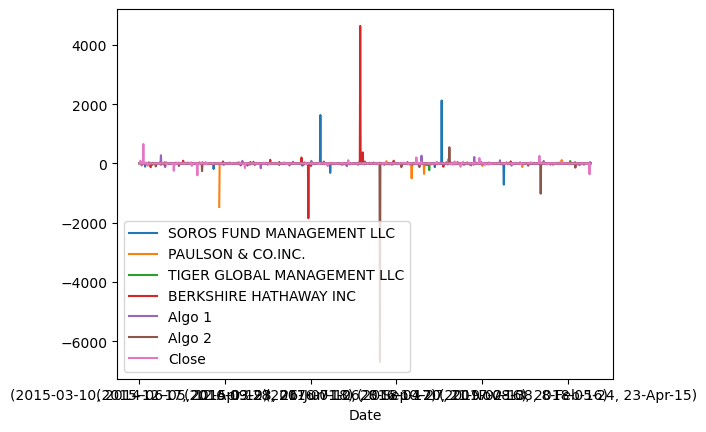

In [75]:
daily_returns_combined.plot()

In [76]:
# Calculate cumulative returns of all portfolios
## Use the 'cumprod' function to cumulatively multiply each element in the series by it's preceding element until the end
cumulative_returns = (1 + daily_returns_combined).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-11, 2014-06-06, 11-Apr-19)",-1.390912,-1.966750,-1.274177,-0.882260,-0.542965,-0.376459,-11.425128
"(2015-03-12, 2014-06-09, 10-Apr-19)",-1.805287,-2.923263,-2.085911,-2.109086,-2.233668,-0.573347,-1.060468
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.756671,-0.732543,-0.693920,-0.163960,0.084597,-1.055362,-6.502842
"(2015-03-16, 2014-06-11, 8-Apr-19)",-1.769818,-1.670796,-1.658407,-1.827046,0.171748,-1.283121,8.692427


<AxesSubplot:xlabel='Date'>

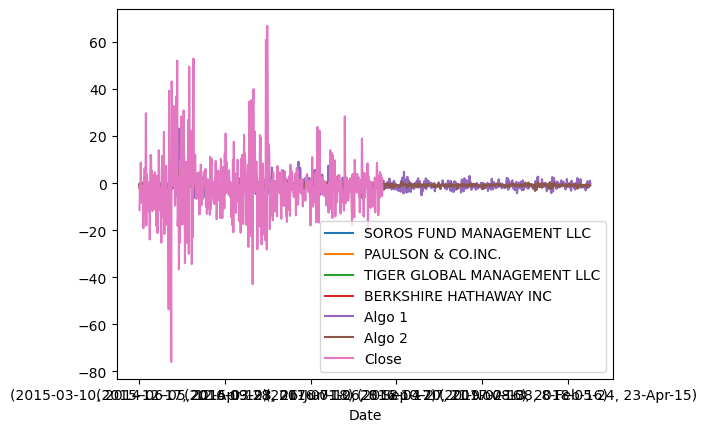

In [77]:
#  Plot cumulative returns
## Use the plot function to plot the cumulative portfolio returns
cumulative_returns.plot()

<AxesSubplot:>

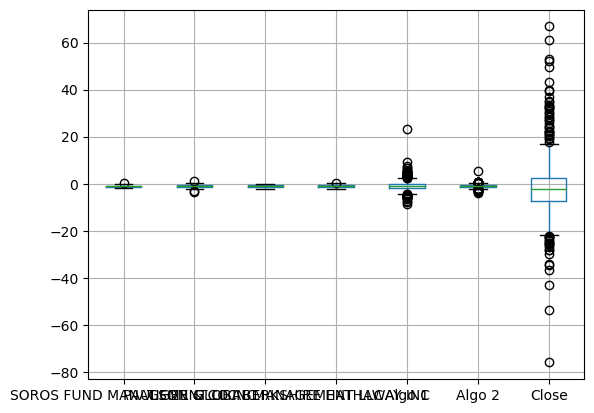

In [78]:
# Create a box plot for each portfolio
## Box plot to visually show risk 
cumulative_returns.boxplot()

In [79]:
#Calculate Standard Deviations of all portfolios
# might need to do each individual portfolio
whale_std = whale_returns.std
whale_std

<bound method NDFrame._add_numeric_operations.<locals>.std of             Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
5     2015-03-09                   0.000582            0.004225   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
1                       -0.000496               -0.006569  
2            

In [80]:
algo_std = algo_returns.std
algo_std

<bound method NDFrame._add_numeric_operations.<locals>.std of             Date    Algo 1    Algo 2
6     2014-06-05  0.004062  0.013285
7     2014-06-06  0.001857  0.008284
8     2014-06-09 -0.005012  0.005668
9     2014-06-10  0.004406 -0.000735
10    2014-06-11  0.004760 -0.003761
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1235 rows x 3 columns]>

In [81]:
combined_std = combined_data.std
combined_std

<bound method NDFrame._add_numeric_operations.<locals>.std of                                      SOROS FUND MANAGEMENT LLC  \
Date                                                             
(2015-03-10, 2014-06-05, 12-Apr-19)                  -0.010263   
(2015-03-11, 2014-06-06, 11-Apr-19)                   0.004012   
(2015-03-12, 2014-06-09, 10-Apr-19)                   0.008265   
(2015-03-13, 2014-06-10, 9-Apr-19)                   -0.002497   
(2015-03-16, 2014-06-11, 8-Apr-19)                    0.007901   
...                                                        ...   
(2019-04-25, 2018-08-03, 11-Feb-15)                  -0.000285   
(2019-04-26, 2018-08-06, 10-Feb-15)                   0.008149   
(2019-04-29, 2018-08-07, 9-Feb-15)                    0.001254   
(2019-04-30, 2018-08-08, 6-Feb-15)                   -0.001295   
(2019-05-01, 2018-08-09, 5-Feb-15)                   -0.005847   

                                     PAULSON & CO.INC.   \
Date                

In [82]:
# Calculate the daily standard deviation of S&P 500
sp500_std = sp500_history.std
sp500_std
# Determine which portfolios are riskier than the S&P 500
 ## Using the standard deviation data it can be noted that the risker portfolio is the whale_returns protfolio as it shows a lower std rate which indicates a higher risk in comparison to that of the SP 500. 

<bound method NDFrame._add_numeric_operations.<locals>.std of            Date     Close
0     23-Apr-19       NaN
1     22-Apr-19 -0.008764
2     18-Apr-19 -0.001011
3     17-Apr-19 -0.001577
4     16-Apr-19  0.002279
...         ...       ...
1644   5-Oct-12  0.003469
1645   4-Oct-12  0.000322
1646   3-Oct-12 -0.007123
1647   2-Oct-12 -0.003611
1648   1-Oct-12 -0.000872

[1649 rows x 2 columns]>

In [83]:
# Calculate the Annualized Standard Deviation 
combined_std_annual = combined_data.std() * np.sqrt(252)
combined_std_annual 

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
Close                          0.135777
dtype: float64

In [86]:
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630
"(2015-03-11, 2014-06-06, 11-Apr-19)",0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566
"(2015-03-12, 2014-06-09, 10-Apr-19)",0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466
"(2015-03-16, 2014-06-11, 8-Apr-19)",0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105


In [267]:
# Rolling Statistics
## Calculate the rolling standard deviation for all portfolios using a 21 day window 
twenty_one_day_rolling = combined_data.rolling(window=21).std()
twenty_one_day_rolling.head(21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,my_portfolio
Date,,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-11, 2014-06-06, 11-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-12, 2014-06-09, 10-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-13, 2014-06-10, 9-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-16, 2014-06-11, 8-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-17, 2014-06-12, 5-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-18, 2014-06-13, 4-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-19, 2014-06-16, 3-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-20, 2014-06-17, 2-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

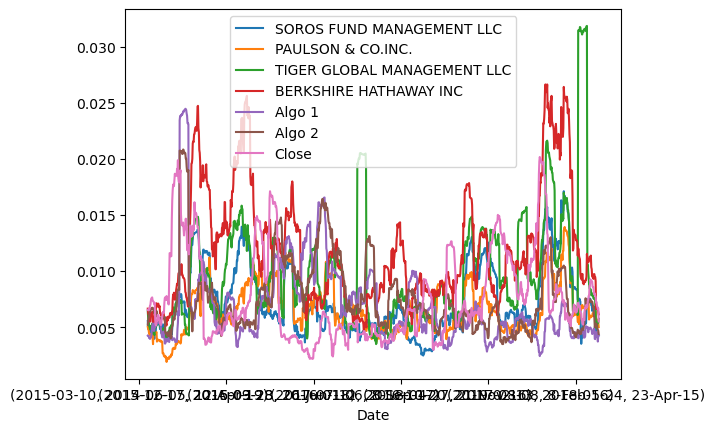

In [120]:
# Plot the rolling standard deviation
twenty_one_day_rolling.plot()

In [121]:
# Claculate the correlation
correlation_twenty_one_day_rolling = twenty_one_day_rolling.corr()

<AxesSubplot:>

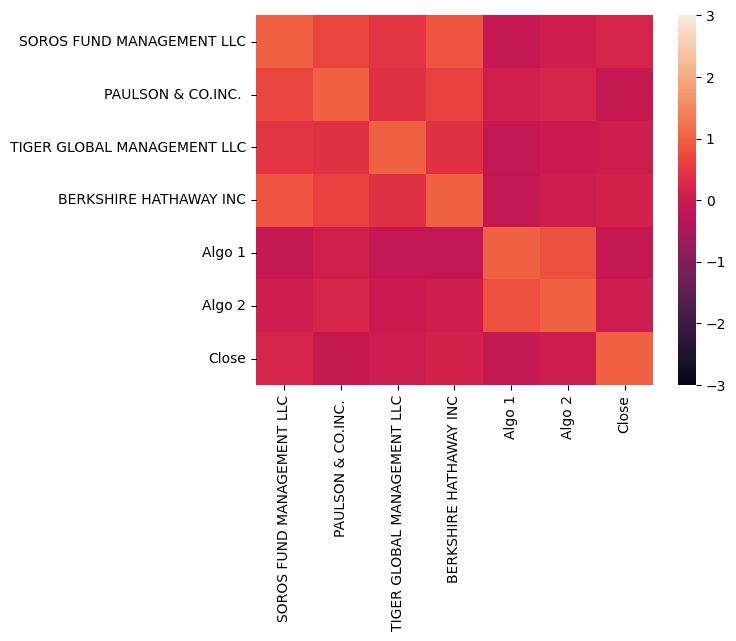

In [125]:
# Display the correlation matrix
sns.heatmap(correlation_twenty_one_day_rolling, vmin=-3, vmax=3)

In [137]:
# Calculate and Plot Beta for a chosen portfolio 
## Calculate covariance of a single portfolio
covariance = cumulative_returns['Algo 1'].cov(cumulative_returns['Close'])
covariance

-1.4082841423130688

In [138]:
# Calculate variance of S&P 500
variance = cumulative_returns['Close'].var()
variance

170.71660270418562

In [139]:
# Caluclate beta of portfolio of Algo 1
algo_1_beta = covariance/variance 
algo_1_beta

-0.008249251215204393

<AxesSubplot:xlabel='Date'>

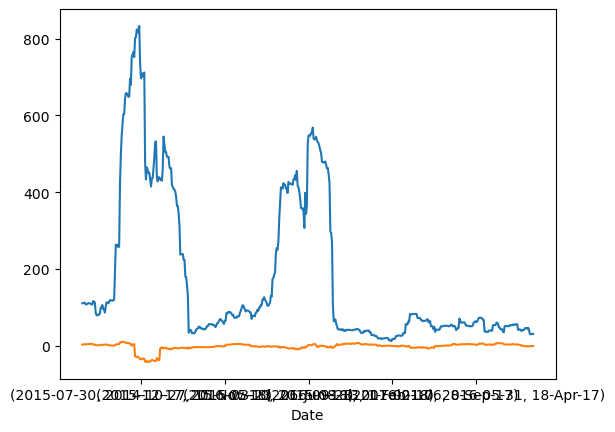

In [147]:
rolling_variance = cumulative_returns['Close'].rolling(window= 30).var()
rolling_variance.plot()
rolling_covariance = cumulative_returns['Algo 1'].rolling(window=30).cov(cumulative_returns['Close'])
rolling_covariance.plot()

<AxesSubplot:xlabel='Date'>

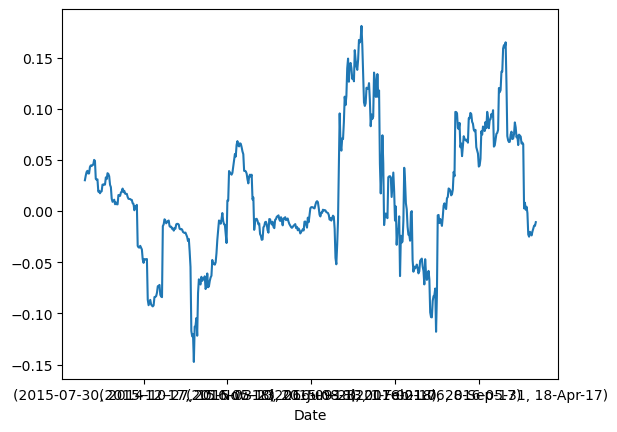

In [149]:
#calculate and plot BETA
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot()

In [151]:
# Sharpe Ratios
## Analyse Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() *252) / (cumulative_returns.std() *np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -35.120045
PAULSON & CO.INC.             -22.803218
TIGER GLOBAL MANAGEMENT LLC   -36.766481
BERKSHIRE HATHAWAY INC        -25.747414
Algo 1                         -7.260041
Algo 2                        -24.751500
Close                          -1.991940
dtype: float64

<AxesSubplot:>

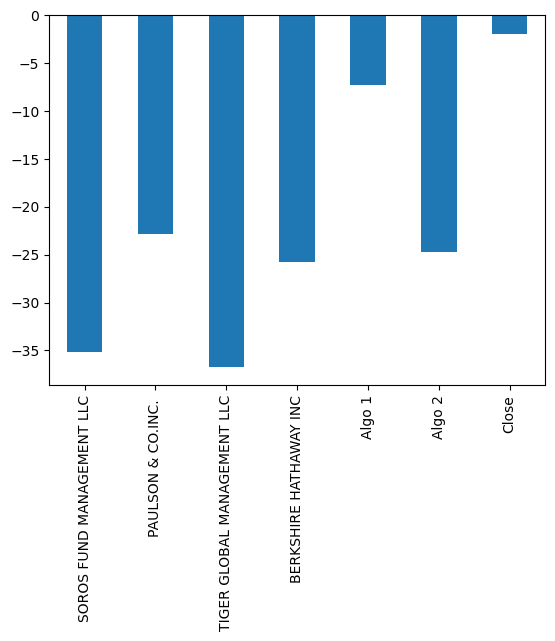

In [152]:
# visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

In [269]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios
##the algorithimic strategies do outperform both the market and the s& p portfolio

In [268]:
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2015-03-11, 2014-06-06, 11-Apr-19)",-1.390912,-1.966750,-1.274177,-0.882260,-0.542965,-0.376459,-11.425128
"(2015-03-12, 2014-06-09, 10-Apr-19)",-1.805287,-2.923263,-2.085911,-2.109086,-2.233668,-0.573347,-1.060468
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.756671,-0.732543,-0.693920,-0.163960,0.084597,-1.055362,-6.502842
"(2015-03-16, 2014-06-11, 8-Apr-19)",-1.769818,-1.670796,-1.658407,-1.827046,0.171748,-1.283121,8.692427


In [ ]:
##Create Custom Portfolio

In [190]:
# Reading Data from 1st stock
cost_data = Path("cost_historical.csv")
goog_data = Path("goog_historical.csv")
appl_data = Path("aapl_historical.csv")

cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
appl_df = pd.read_csv(appl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [162]:
apple_df = appl_df.drop(columns = ["Symbol"])
apple_df.columns = ["APPL"]
apple_df

,APPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [164]:
google_df = goog_df.drop(columns=['Symbol'])
google_df.columns = ["GOOG"]
google_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [165]:
COST_df= cost_df.drop(columns=['Symbol'])
COST_df.columns = ["COST"]
COST_df

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [167]:
# Create a new DataFrame where the columns are the closing prices for each ticker
portfolio_df = pd.concat([google_df, COST_df, apple_df], axis="columns", join="inner")

# Sort datatime index in ascending order (past to present)
portfolio_df = portfolio_df.sort_index()
portfolio_df.head()

,GOOG,COST,APPL
Trade DATE,,,
2018-05-11,1098.26,195.76,188.59
2018-05-14,1100.20,195.88,188.15
2018-05-15,1079.23,195.48,186.44
2018-05-16,1081.77,198.71,188.18
2018-05-17,1078.59,199.60,186.99


In [185]:
# Use the 'pct_change' function to calculate daily returns
daily_returns = portfolio_df.pct_change()
daily_returns.head()
daily_returns.dropna()

,GOOG,COST,APPL
Trade DATE,,,
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324
2018-05-18,-0.011339,-0.003206,-0.003637
...,...,...,...
2019-05-03,0.019602,0.007953,0.012431
2019-05-06,0.003366,-0.001594,-0.015443
2019-05-07,-0.012855,-0.016583,-0.026957


In [274]:
# Calculate the weighted returns for the porfolio assuming an equal number of shares for each stock
## Set weights for corresponding risk profile of stocks
weights = [1/3, 1/3, 1/3]

## Use the 'dot' function to sum the product each weight and the corresponding stock daily return.
portfolio_returns = daily_returns.dot(weights)

#Display sample values
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

In [273]:
# Join returns DataFrame to the original returns DataFrame
all_returns_data = pd.concat([portfolio_returns, combined_data], axis = "columns", join = "inner")
all_returns_data.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,my_portfolio


In [214]:
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,my_portfolio
Date,,,,,,,,
"(2015-03-10, 2014-06-05, 12-Apr-19)",-0.010263,-0.005341,-0.012079,-0.009739,0.004062,0.013285,0.000630,NaN
"(2015-03-11, 2014-06-06, 11-Apr-19)",0.004012,0.005163,0.003312,-0.001147,0.001857,0.008284,-0.006566,NaN
"(2015-03-12, 2014-06-09, 10-Apr-19)",0.008265,0.010272,0.013117,0.010801,-0.005012,0.005668,-0.000038,NaN
"(2015-03-13, 2014-06-10, 9-Apr-19)",-0.002497,-0.001428,-0.003697,-0.008142,0.004406,-0.000735,-0.003466,NaN
"(2015-03-16, 2014-06-11, 8-Apr-19)",0.007901,0.003583,0.007953,0.008055,0.004760,-0.003761,0.006105,NaN
...,...,...,...,...,...,...,...,...
"(2019-04-25, 2018-08-03, 11-Feb-15)",-0.000285,-0.001291,-0.005153,0.004848,-0.003656,0.002817,-0.009552,NaN
"(2019-04-26, 2018-08-06, 10-Feb-15)",0.008149,0.009162,0.012355,0.010434,0.000529,0.000285,0.000029,NaN
"(2019-04-29, 2018-08-07, 9-Feb-15)",0.001254,0.002719,0.006251,0.005223,0.000207,-0.001330,-0.010563,NaN


In [270]:
combined_data['my_portfolio'] = portfolio_returns
combined_data.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,my_portfolio
Date,,,,,,,,
"(2015-11-26, 2015-03-02, 18-Jul-18)",0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.003969,NaN
"(2018-10-22, 2018-02-02, 12-Aug-15)",-0.012042,-0.005205,-0.017305,0.010424,-0.004187,-0.020497,0.001277,NaN
"(2016-10-21, 2016-02-01, 15-Aug-17)",0.000168,-0.005110,-0.002161,0.000765,0.009405,-0.001074,-0.001418,NaN
"(2016-01-18, 2015-04-21, 29-May-18)",0.000000,0.000000,0.000000,0.000000,0.004552,-0.001794,-0.012537,NaN
"(2015-11-23, 2015-02-25, 23-Jul-18)",-0.001089,-0.003781,0.003151,0.012117,0.002055,0.004101,-0.004758,NaN
